In [16]:
import scipy.stats as stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
data = pd.read_excel('./AB_Test_Results (2).xlsx')
data.head(5)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [9]:
data['REVENUE'].describe()

count    10000.000000
mean         0.099447
std          2.318529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        196.010000
Name: REVENUE, dtype: float64

In [10]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [17]:
stats.shapiro(data['REVENUE'])

ShapiroResult(statistic=0.018358170986175537, pvalue=0.0)

**pvalue < 0.05, распределение не нормальное**

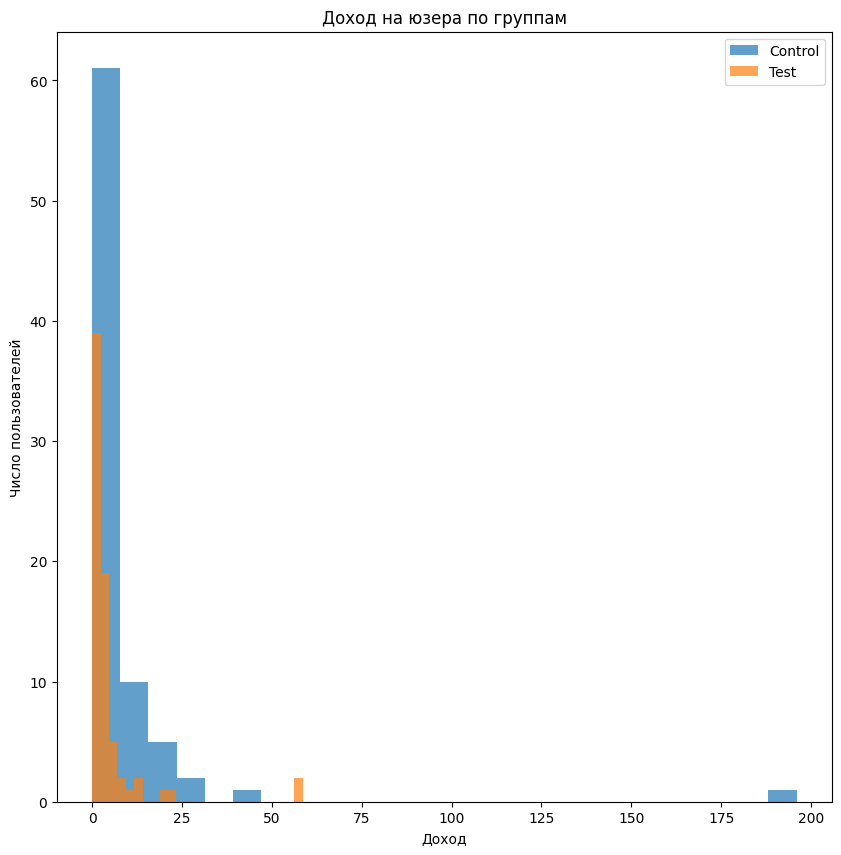

In [19]:
plt.figure(figsize=(10,10))

control = data['REVENUE'][(data['VARIANT_NAME'] == 'control')&(data['REVENUE'] > 0)]
test =data['REVENUE'][(data['VARIANT_NAME'] == 'variant')&(data['REVENUE'] > 0)]


plt.hist(control, bins = 25, alpha =0.7, label='Control')
plt.hist(test, bins = 25, alpha =0.7, label='Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

На графике посторено распредление дохода в контрольной и тестовой группах. Юзеры с доходом = 0 не включены. 
Видно, что рапределение даже без нудевых значений далекое от нормального. Плюс есть выбросы как в одной группе, так и в другой. Это может говорить нам о том, что либо данные некорректные, либо была недостаточная выборка.  

In [22]:
control1 = data['REVENUE'][(data['VARIANT_NAME'] == 'control')]
test1 =data['REVENUE'][(data['VARIANT_NAME'] == 'variant')]

In [23]:
stats.ttest_ind(control1.values, test1.values, equal_var = False)

Ttest_indResult(statistic=1.268403803110966, pvalue=0.20469713432410774)

In [24]:
stats.mannwhitneyu(control1.values, test1.values)

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)

В обоих тестах pvalue > альфа, значит мы не может отвергнуть нулевую гипотезу и стат значимых различий не наблюдается. 
Следовательно, тестовую версию мы НЕ "раскатывем" на всех пользователях. Но так как возникли сомнения в валидностиданных, лиюо лучше еще раз провести тест, либо обработать данные лучше.